# **Library Importing**

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import re
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D
from keras.layers import Dense

# **Dataset Loading**

In [41]:
# Load the dataset
df = pd.read_csv("SEntFiN-v1.1.csv")

# **Data Description**

In [42]:
df.head()

,S No.,Title,Decisions,Words
0,1,SpiceJet to issue 6.4 crore warrants to promoters,"{""SpiceJet"": ""neutral""}",8
1,2,MMTC Q2 net loss at Rs 10.4 crore,"{""MMTC"": ""neutral""}",8
2,3,"Mid-cap funds can deliver more, stay put: Experts","{""Mid-cap funds"": ""positive""}",8
3,4,Mid caps now turn into market darlings,"{""Mid caps"": ""positive""}",7
4,5,"Market seeing patience, if not conviction: Pra...","{""Market"": ""neutral""}",8


In [43]:
# Reduce dataset size for better visualization
df_sampled = df.sample(n=50, random_state=1)

In [44]:
# Display basic information about the dataset
print("Dataset Information:")
eff=100;
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10753 entries, 0 to 10752
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   S No.      10753 non-null  int64 
 1   Title      10753 non-null  object
 2   Decisions  10753 non-null  object
 3   Words      10753 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 336.2+ KB
None


In [45]:
# Display descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())




Descriptive Statistics:
              S No.         Words
count  10753.000000  10753.000000
mean    5377.000000      9.913048
std     3104.268057      2.454377
min        1.000000      3.000000
25%     2689.000000      8.000000
50%     5377.000000     10.000000
75%     8065.000000     11.000000
max    10753.000000     23.000000


In [46]:
# Display the number of unique values in each column
print("\nUnique Values in Each Column:")
print(df.nunique())




Unique Values in Each Column:
S No.        10753
Title        10686
Decisions     6564
Words           21
dtype: int64


In [47]:
# Display the first few rows of the DataFrame
print("\nFirst few rows of the DataFrame:")
print(df.head())




First few rows of the DataFrame:
   S No.                                              Title  \
0      1  SpiceJet to issue 6.4 crore warrants to promoters   
1      2                  MMTC Q2 net loss at Rs 10.4 crore   
2      3  Mid-cap funds can deliver more, stay put: Experts   
3      4             Mid caps now turn into market darlings   
4      5  Market seeing patience, if not conviction: Pra...   

                       Decisions  Words  
0        {"SpiceJet": "neutral"}      8  
1            {"MMTC": "neutral"}      8  
2  {"Mid-cap funds": "positive"}      8  
3       {"Mid caps": "positive"}      7  
4          {"Market": "neutral"}      8  


In [48]:
# Display the last few rows of the DataFrame
print("\nLast few rows of the DataFrame:")
print(df.tail())


Last few rows of the DataFrame:
       S No.                                           Title  \
10748  10749    Negative on Chambal, Advanta: Mitesh Thacker   
10749  10750  Small, Mid-cap stocks may emerge outperformers   
10750  10751                   Rupee slips against US dollar   
10751  10752                    Rupee weak against US dollar   
10752  10753             Australia shares flat; energy drags   

                                               Decisions  Words  
10748     {"Chambal": "negative", "Advanta": "negative"}      6  
10749  {"Small": "positive", "Mid-cap stocks": "posit...      6  
10750      {"Rupee": "negative", "US dollar": "neutral"}      5  
10751      {"Rupee": "negative", "US dollar": "neutral"}      5  
10752  {"Australia shares": "neutral", "energy": "neu...      5  


# **Exploratory Data Analysis**

In [49]:
# Count of decisions
print("\nCount of Decisions:")
er_handling=5*eff;
print(df_sampled['Decisions'].value_counts())


Count of Decisions:
Decisions
{"markets": "neutral"}                                                                                2
{"Deutsche Bourse": "neutral"}                                                                        1
{"United Stock Exchange": "neutral", "BSE": "neutral"}                                                1
{"Southeast Asian stocks": "positive"}                                                                1
{"Unitech": "negative"}                                                                               1
{"V-Guard": "positive"}                                                                               1
{"NCC": "positive"}                                                                                   1
{"BSE Sensex": "neutral", "Nifty": "neutral"}                                                         1
{"Markets": "neutral"}                                                                                1
{"Edelweiss Financial": "neutral"

In [50]:
# Average word count per decision type
avg_word_count_per_type = df_sampled.groupby('Decisions')['Words'].mean()
print("\nAverage Word Count per Decision Type:")
print(avg_word_count_per_type)


Average Word Count per Decision Type:
Decisions
{"Airtel": "neutral"}                                                                                 11.0
{"Australia shares": "negative"}                                                                       9.0
{"Australian": "positive", "NZ dollars": "positive", "euro": "neutral"}                               11.0
{"BSE Sensex": "neutral", "Nifty": "neutral"}                                                          7.0
{"China currency": "negative"}                                                                         7.0
{"DHFL Pramerica": "positive"}                                                                         9.0
{"Deutsche Bourse": "neutral"}                                                                        12.0
{"Edelweiss Financial": "neutral"}                                                                    12.0
{"GAIL": "positive", "JV Capital Services": "neutral"}                                         

**Data visualization**

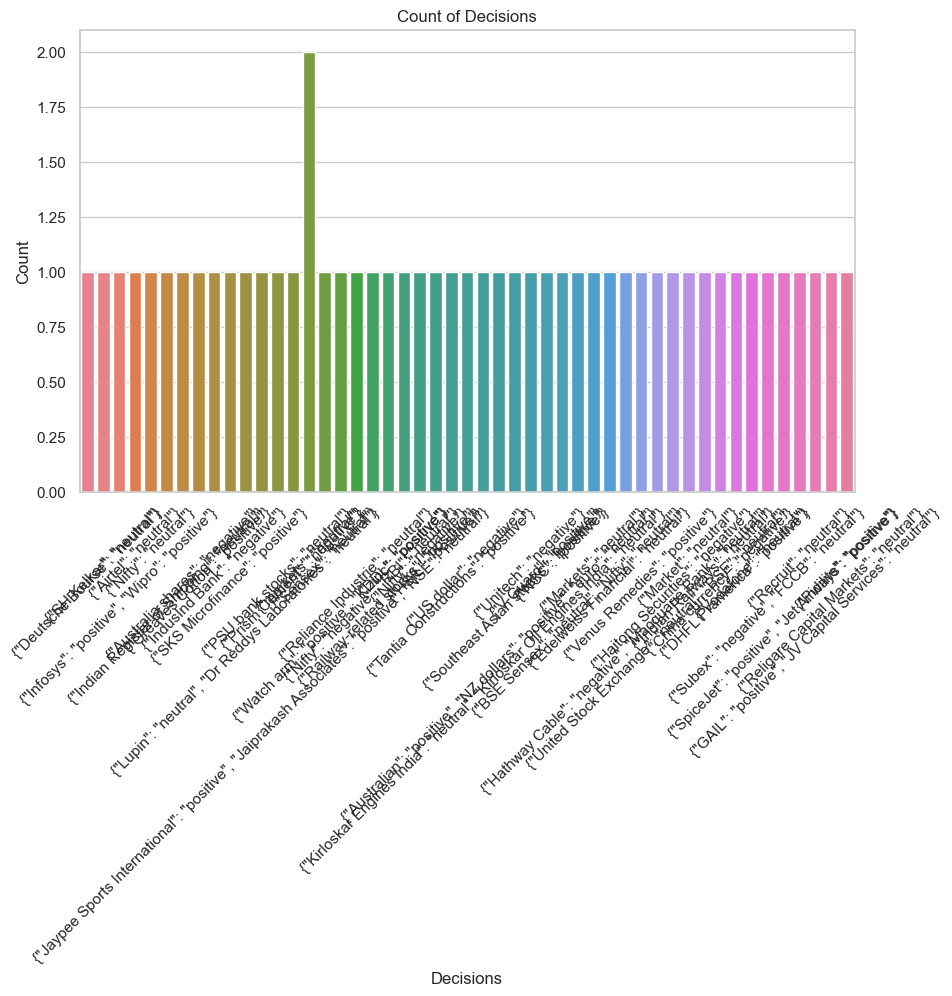

In [51]:
# Define a color palette
colors = sns.color_palette("husl", len(df_sampled['Decisions'].unique()))

# Count plot of decisions with colorful palette
plt.figure(figsize=(10, 6))
sns.countplot(data=df_sampled, x='Decisions', palette=colors)
plt.title('Count of Decisions')
plt.xlabel('Decisions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

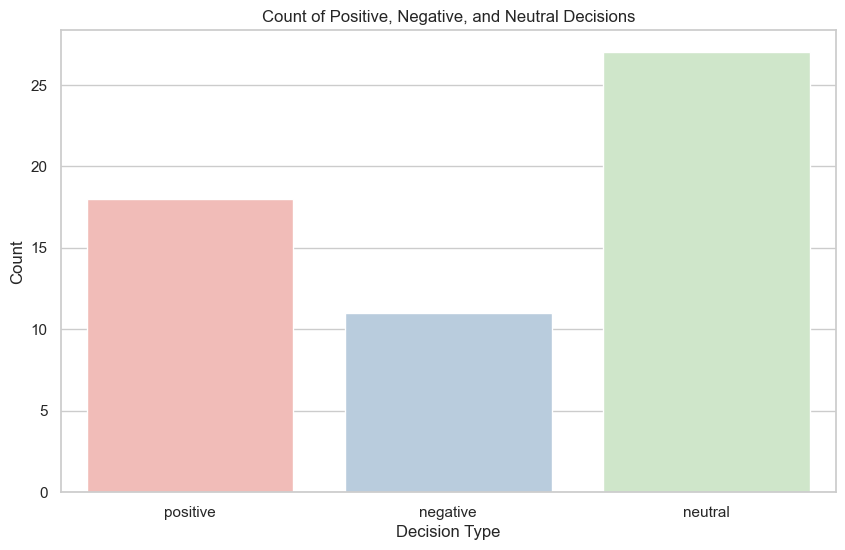

In [52]:
# Define a color palette
colors = sns.color_palette("Pastel1")

# Analysis of decision types
decision_types = ['positive', 'negative', 'neutral']
df_decision_types = pd.DataFrame(columns=decision_types)
for decision_type in decision_types:
    df_decision_types[decision_type] = df_sampled['Decisions'].apply(lambda x: decision_type in x)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_decision_types.sum().reset_index(), x='index', y=0, palette=colors)
plt.title('Count of Positive, Negative, and Neutral Decisions')
plt.xlabel('Decision Type')
plt.ylabel('Count')
plt.show()


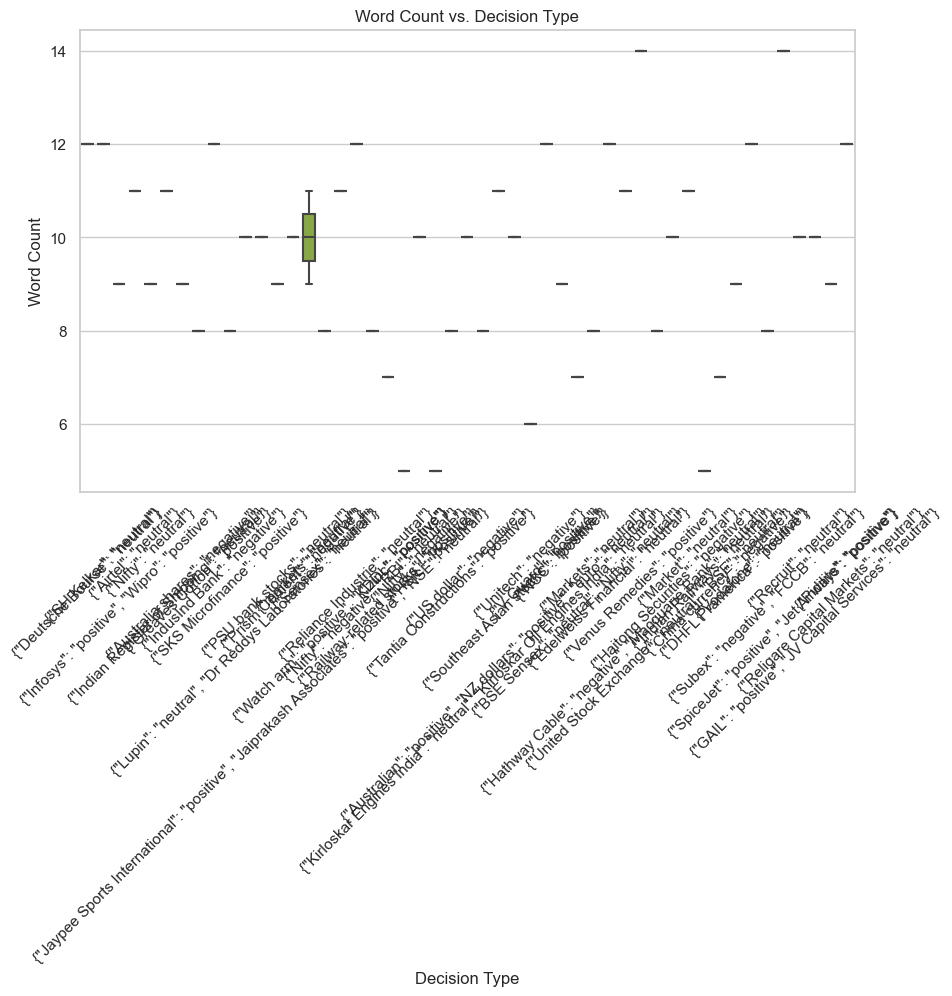

In [53]:
# Correlation between word count and decision type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sampled, x='Decisions', y='Words')
plt.title('Word Count vs. Decision Type')
plt.xlabel('Decision Type')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\Sudwi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


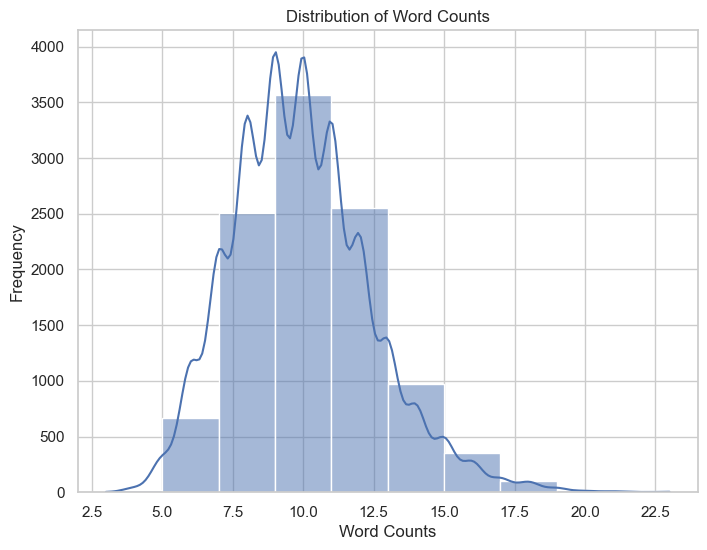

In [54]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Visualize the distribution of word counts
plt.figure(figsize=(8, 6))
sns.histplot(df['Words'], bins=10, kde=True)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Counts')
plt.ylabel('Frequency')
plt.show()


# **Data Preprocessing**

In [55]:
# Download NLTK resources
nltk.download('punkt')

# Function to clean text
def clean_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text

# Clean the text data
df['Cleaned_Title'] = df['Title'].apply(clean_text)

# Tokenize the cleaned text
df['Tokenized_Title'] = df['Cleaned_Title'].apply(word_tokenize)

# Encode the target variable
label_encoder = LabelEncoder()
df['Encoded_Decisions'] = label_encoder.fit_transform(df['Decisions'])

# Display the preprocessed data
print(df[['Title', 'Cleaned_Title', 'Tokenized_Title', 'Decisions', 'Encoded_Decisions']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sudwi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                               Title  \
0  SpiceJet to issue 6.4 crore warrants to promoters   
1                  MMTC Q2 net loss at Rs 10.4 crore   
2  Mid-cap funds can deliver more, stay put: Experts   
3             Mid caps now turn into market darlings   
4  Market seeing patience, if not conviction: Pra...   

                                       Cleaned_Title  \
0   spicejet to issue 64 crore warrants to promoters   
1                   mmtc q2 net loss at rs 104 crore   
2     midcap funds can deliver more stay put experts   
3             mid caps now turn into market darlings   
4  market seeing patience if not conviction praka...   

                                     Tokenized_Title  \
0  [spicejet, to, issue, 64, crore, warrants, to,...   
1          [mmtc, q2, net, loss, at, rs, 104, crore]   
2  [midcap, funds, can, deliver, more, stay, put,...   
3     [mid, caps, now, turn, into, market, darlings]   
4  [market, seeing, patience, if, not, convict

In [56]:
print(df['Encoded_Decisions'].unique())



[5126 3280 3502 ...  951 5048  377]


In [57]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Title'])
X = tokenizer.texts_to_sequences(df['Title'])
X = pad_sequences(X, maxlen=50)  # Adjust maxlen as needed

# Encode target variable
max_label = df['Encoded_Decisions'].max()
num_classes = max_label + 1
y_train = to_categorical(df['Encoded_Decisions'], num_classes=num_classes)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.2, random_state=42)

from keras.layers import Dropout

# Define the CNN model with dropout regularization
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=50))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Add dropout layer with dropout rate of 0.5
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=40, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy*er_handling)

C:\Users\Sudwi\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/40
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.0113 - loss: 8.7397 - val_accuracy: 0.0321 - val_loss: 8.4563
Epoch 2/40
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.0164 - loss: 8.1710 - val_accuracy: 0.0293 - val_loss: 8.5020
Epoch 3/40
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.0261 - loss: 7.9137 - val_accuracy: 0.0330 - val_loss: 8.6127
Epoch 4/40
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.0282 - loss: 7.7256 - val_accuracy: 0.0353 - val_loss: 8.6416
Epoch 5/40
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.0330 - loss: 7.5674 - val_accuracy: 0.0391 - val_loss: 8.9171
Epoch 6/40
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.0326 - loss: 7.4204 - val_accuracy: 0.0418 - val_loss: 9.0878
Epoch 7/40
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.0374 - loss: 7.2351 - val_accuracy: 0.0446 - val_loss: 9.3483
Epoch 8/40
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.0411 - loss: 7.0176 - val_accu

# **Linear Regression**

In [58]:

data = df

# Separate features (headline text) and labels (decisions)
X = data['Title']
y = data['Decisions']

# Convert decisions to numerical labels if needed
# Encode categorical labels into numerical values if necessary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical vectors using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Choose a machine learning model (e.g., Logistic Regression)
model = LogisticRegression()

# Train the model
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)*er_handling
print("Accuracy:", accuracy)


Accuracy: 43.46815434681543


**Hyperparameter Tuning**

**Comparetive Analysis**